In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Linearly Seperable

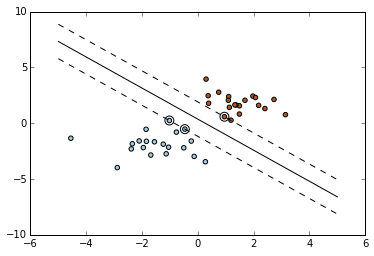

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)


# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)



# Let's add in an outlier

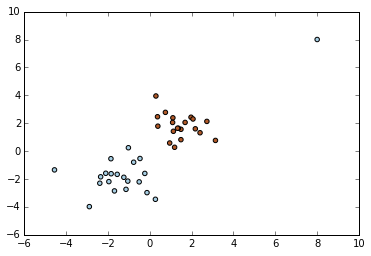

In [3]:
X = np.r_[X, [[8,8]]]
Y = Y +[0] 
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

In [4]:
def plotting(clf, X, Y, i, title = ""):
    
    plt.figure(i)
    #plt.subplot(2,1,i)
    plt.clf()


    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired)

    # Circle out the test data
    plt.scatter(X[:, 0], X[:, 1], s=80, facecolors='none', zorder=10)

    #plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],levels=[-.5, 0, .5])
    plt.title(title)

# Create non-linearly seperable data

In [5]:
np.random.seed(0)
X = np.r_[X, np.random.randn(20, 2) + [2, -2],np.random.randn(20, 2) + [-2, 2]]
Y = Y +[1] * 40

* gamma: Defines how far the influence of a single training example reaches
    1. low values meaning ‘far’ 
    2. high values meaning ‘close’
    3. Can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.
    
* C: Trades off misclassification of training examples against simplicity of the decision surface. 
    1. Low C makes the decision surface smooth
    2. High C aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors.




The model is very sensitive to the gamma parameter. 

* If gamma is too large, the radius of the area of influence of the support vectors only includes the support vector it-self and no amount of regularization with C will be able to prevent of overfitting.
* When gamma is very small, the model is too constrained and cannot capture the complexity or “shape” of the data.